In [1]:
import pandas as pd
import numpy as np
import os
os.getcwd()

'C:\\Users\\szabo\\python\\vv'

In [ ]:
#ANALYSIS OF THE DATASET BEFORE ANNOTATION

In [3]:
#read data stored as a csv file into a pandas DataFrame
vv_nei = pd.read_csv('VV4.out.lemma', sep="\t", header = None)
vv_nei

,0,1
0,"Vannak könnyebb , és nehezebb napok . Elhiszem...",baromi
1,De olyan kis Baromi jól néz ki ! Nekem a nekem...,baromi
2,"Üh . Jó és akkor baromi egyszerű , tehát Tesió...",baromi
3,"4700 ! Hú , az baromi sok pénz ! Darab .",baromi
4,"Én is úgy gondolom , mert én néztem az egy két...",baromira
...,...,...
2276,Most ennél most mi a koncepciója ennek a videó...,őrült
2277,"Én azért is hiszek magamba . Tudom , hogy még ...",őrült
2278,"Felszívod így szívod , és így csinálsz a végén...",őrült
2279,"Felszívod így , szívod , és így csinálsz a vég...",őrült


In [4]:
#name columns
vv_nei.columns =["sentence", "nei"]
vv_nei

,sentence,nei
0,"Vannak könnyebb , és nehezebb napok . Elhiszem...",baromi
1,De olyan kis Baromi jól néz ki ! Nekem a nekem...,baromi
2,"Üh . Jó és akkor baromi egyszerű , tehát Tesió...",baromi
3,"4700 ! Hú , az baromi sok pénz ! Darab .",baromi
4,"Én is úgy gondolom , mert én néztem az egy két...",baromira
...,...,...
2276,Most ennél most mi a koncepciója ennek a videó...,őrült
2277,"Én azért is hiszek magamba . Tudom , hogy még ...",őrült
2278,"Felszívod így szívod , és így csinálsz a végén...",őrült
2279,"Felszívod így , szívod , és így csinálsz a vég...",őrült


In [14]:
#read NEW dictionary 
cols = [0,2,4,5,6]
negemo = pd.read_excel('negemotiv_vegleges.xlsx', usecols = cols)
negemo

,token,eva_is,tragar,sexualis,value
0,állat,x,NaN,NaN,negemo
1,állati,x,NaN,NaN,negemo
2,állatira,NaN,NaN,NaN,negemo
3,átkozott,NaN,NaN,NaN,negemo
4,átkozottul,NaN,NaN,NaN,negemo
...,...,...,...,...,...
220,vérfagyasztóan,NaN,NaN,NaN,negemo
221,veszett,x,NaN,NaN,negemo
222,veszettül,x,NaN,NaN,negemo
223,visszataszítóan,NaN,NaN,NaN,negemo


In [16]:
#select necessary columns from the dictionary
negemo = negemo.rename(columns={"token": "nei"})
negemo

,nei,eva_is,tragar,sexualis,value
0,állat,x,NaN,NaN,negemo
1,állati,x,NaN,NaN,negemo
2,állatira,NaN,NaN,NaN,negemo
3,átkozott,NaN,NaN,NaN,negemo
4,átkozottul,NaN,NaN,NaN,negemo
...,...,...,...,...,...
220,vérfagyasztóan,NaN,NaN,NaN,negemo
221,veszett,x,NaN,NaN,negemo
222,veszettül,x,NaN,NaN,negemo
223,visszataszítóan,NaN,NaN,NaN,negemo


In [17]:
#data processing with the dictionary
negemo_eva = vv_nei.reset_index(drop=True).merge(negemo, how='left', on='nei')  
negemo_eva

,sentence,nei,eva_is,tragar,sexualis,value
0,"Vannak könnyebb , és nehezebb napok . Elhiszem...",baromi,x,NaN,NaN,negemo
1,De olyan kis Baromi jól néz ki ! Nekem a nekem...,baromi,x,NaN,NaN,negemo
2,"Üh . Jó és akkor baromi egyszerű , tehát Tesió...",baromi,x,NaN,NaN,negemo
3,"4700 ! Hú , az baromi sok pénz ! Darab .",baromi,x,NaN,NaN,negemo
4,"Én is úgy gondolom , mert én néztem az egy két...",baromira,NaN,NaN,NaN,negemo
...,...,...,...,...,...,...
2276,Most ennél most mi a koncepciója ennek a videó...,őrült,x,NaN,NaN,negemo
2277,"Én azért is hiszek magamba . Tudom , hogy még ...",őrült,x,NaN,NaN,negemo
2278,"Felszívod így szívod , és így csinálsz a végén...",őrült,x,NaN,NaN,negemo
2279,"Felszívod így , szívod , és így csinálsz a vég...",őrült,x,NaN,NaN,negemo


In [18]:
#drop some unnecessary columns
negemo_eva = negemo_eva.drop(columns=['tragar', 'sexualis', 'value'])
negemo_eva

,sentence,nei,eva_is
0,"Vannak könnyebb , és nehezebb napok . Elhiszem...",baromi,x
1,De olyan kis Baromi jól néz ki ! Nekem a nekem...,baromi,x
2,"Üh . Jó és akkor baromi egyszerű , tehát Tesió...",baromi,x
3,"4700 ! Hú , az baromi sok pénz ! Darab .",baromi,x
4,"Én is úgy gondolom , mert én néztem az egy két...",baromira,NaN
...,...,...,...
2276,Most ennél most mi a koncepciója ennek a videó...,őrült,x
2277,"Én azért is hiszek magamba . Tudom , hogy még ...",őrült,x
2278,"Felszívod így szívod , és így csinálsz a végén...",őrült,x
2279,"Felszívod így , szívod , és így csinálsz a vég...",őrült,x


In [19]:
#get rid of unnecessary spaces in the sentences

negemo_eva['sentence'] = negemo_eva['sentence'].replace({' \.':'.'},regex=True)
negemo_eva['sentence'] = negemo_eva['sentence'].replace({' \,':','},regex=True)
negemo_eva['sentence'] = negemo_eva['sentence'].replace({' \;':';'},regex=True)
negemo_eva['sentence'] = negemo_eva['sentence'].replace({' \?':'?'},regex=True)
negemo_eva['sentence'] = negemo_eva['sentence'].replace({' \!':'!'},regex=True)
negemo_eva['sentence'] = negemo_eva['sentence'].replace({' \:':':'},regex=True)
negemo_eva['sentence'] = negemo_eva['sentence'].replace({'" ':'"'},regex=True)
negemo_eva['sentence'] = negemo_eva['sentence'].replace({' "':'"'},regex=True)
negemo_eva['sentence'] = negemo_eva['sentence'].replace({'\( ':'('},regex=True)
negemo_eva['sentence'] = negemo_eva['sentence'].replace({' \)':')'},regex=True)
negemo_eva['sentence'] = negemo_eva['sentence'].replace({'\: \/':':/'},regex=True)
negemo_eva

,sentence,nei,eva_is
0,"Vannak könnyebb, és nehezebb napok. Elhiszem, ...",baromi,x
1,De olyan kis Baromi jól néz ki! Nekem a nekem ...,baromi,x
2,"Üh. Jó és akkor baromi egyszerű, tehát Tesiórá...",baromi,x
3,"4700! Hú, az baromi sok pénz! Darab.",baromi,x
4,"Én is úgy gondolom, mert én néztem az egy két ...",baromira,NaN
...,...,...,...
2276,Most ennél most mi a koncepciója ennek a videó...,őrült,x
2277,"Én azért is hiszek magamba. Tudom, hogy még ne...",őrült,x
2278,"Felszívod így szívod, és így csinálsz a végén ...",őrült,x
2279,"Felszívod így, szívod, és így csinálsz a végén...",őrült,x


In [12]:
#select words in column "nei" that are capable of polarity shifting
csak_eva = negemo_eva[negemo_eva["eva_is"]=="x"]
csak_eva

,sentence,nei,eva_is
0,"Vannak könnyebb, és nehezebb napok. Elhiszem, ...",baromi,x
1,De olyan kis Baromi jól néz ki! Nekem a nekem ...,baromi,x
2,"Üh. Jó és akkor baromi egyszerű, tehát Tesiórá...",baromi,x
3,"4700! Hú, az baromi sok pénz! Darab.",baromi,x
6,"Aha. Aú, de baró lesz! Már látom!",baró,x
...,...,...,...
2276,Most ennél most mi a koncepciója ennek a videó...,őrült,x
2277,"Én azért is hiszek magamba. Tudom, hogy még ne...",őrült,x
2278,"Felszívod így szívod, és így csinálsz a végén ...",őrült,x
2279,"Felszívod így, szívod, és így csinálsz a végén...",őrült,x


In [ ]:
#WORKING WITH THE DATA BEFORE ANNOTATION

In [13]:
#calculate the number and frequency of these words (without annotation)
csak_eva_freq = csak_eva.groupby(['nei'], sort=True).size().reset_index(name='count_eva')
csak_eva_freq["freq"] = csak_eva_freq["count_eva"]/len(csak_eva)
csak_eva_freq

csak_eva_freq = csak_eva_freq.sort_values(['freq'],ascending=False)
csak_eva_freq

,nei,count_eva,freq
7,durva,213,0.256318
26,veszett,153,0.184116
2,beteg,97,0.116727
20,kurvára,73,0.087846
28,állat,54,0.064982
17,kegyetlen,51,0.061372
8,durván,44,0.052948
29,őrült,26,0.031288
4,brutál,21,0.025271
11,félelmetes,17,0.020457


In [14]:
##get the top 20 (without annotation)
csak_eva_top20 = csak_eva_freq[:20]
csak_eva_top20

,nei,count_eva,freq
7,durva,213,0.256318
26,veszett,153,0.184116
2,beteg,97,0.116727
20,kurvára,73,0.087846
28,állat,54,0.064982
17,kegyetlen,51,0.061372
8,durván,44,0.052948
29,őrült,26,0.031288
4,brutál,21,0.025271
11,félelmetes,17,0.020457


In [15]:
#save the top 20 (without annotation)
csak_eva_top20.to_excel('csak_eva_top20.xlsx',sheet_name = 'csak_eva_top20', index=False)

<ipython-input-30-d8bd8d8e5b73>:33: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('eva_freq_NO_ANN.png',dpi=600, bbox_inches='tight', quality=95)


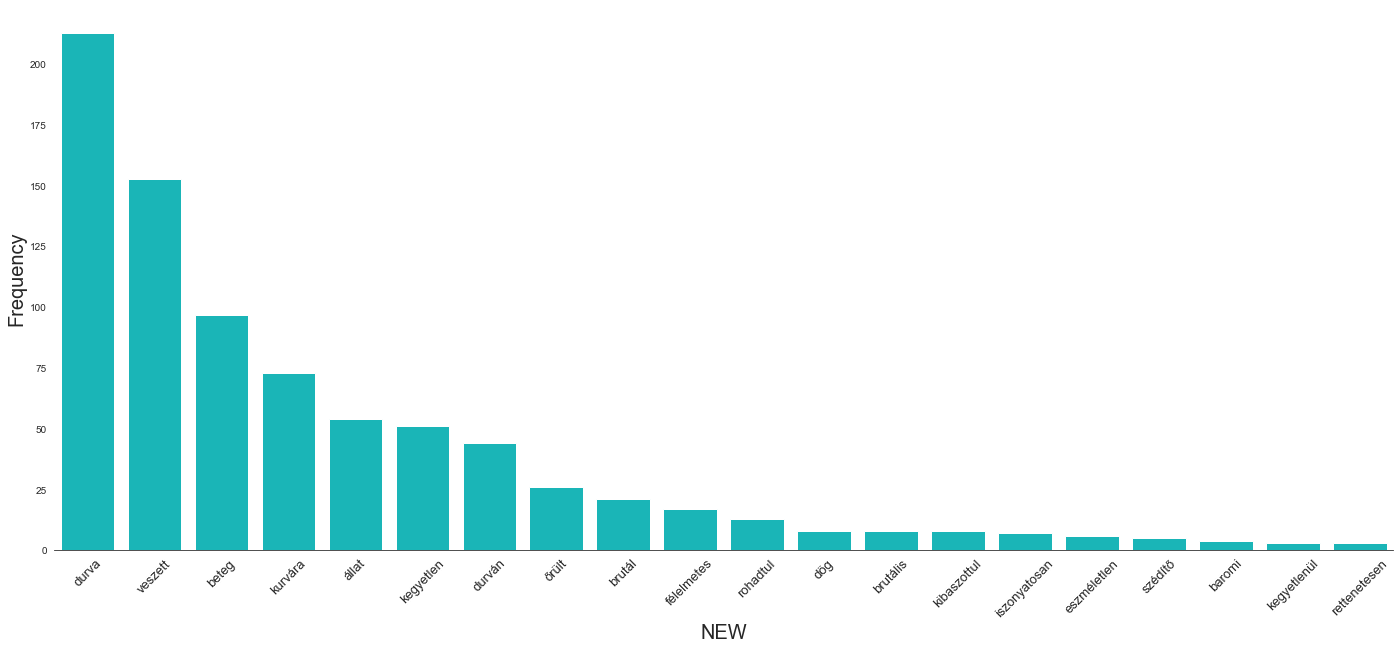

In [30]:
#visualization1

import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns

#Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})

#Plot 1 - background - "total" (top) series
ax = sns.barplot(x = csak_eva_top20.nei, y = csak_eva_top20.count_eva, color = "darkturquoise")

#Plot 2 - overlay - "bottom" series
#bottom_plot = sns.barplot(x = top40_NO_ANN.token, y = top40_NO_ANN.freq_male_token, color = "darkturquoise")

topbar = plt.Rectangle((0,0),1,1,fc="lightcoral", edgecolor = 'none')
#bottombar = plt.Rectangle((0,0),1,1,fc='darkturquoise',  edgecolor = 'none')
#plt.legend(loc=1, ncol = 2, prop={'size':20})
#l.draw_frame(False)

#Optional code - Make plot look nicer
sns.despine(left=True)
ax.set_ylabel("Frequency", fontsize=20)
ax.set_xlabel("NEW", fontsize=20)

plt.xticks(rotation=45,fontsize=13)

#Set fonts to consistent 16pt size
#for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
        #     bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
#item.set_fontsize(20)

plt.savefig('eva_freq_NO_ANN.png',dpi=600, bbox_inches='tight', quality=95)

In [ ]:
#WORKING WITH THE ANNOTATED DATA

In [16]:
#read the annotated dataset
negemo_eva_ANNOTALT = pd.read_excel('negemo_eva_ANNOTALT.xlsx')
negemo_eva_ANNOTALT

,sentence,nei,eva_is,annotacio
0,"Vannak könnyebb, és nehezebb napok. Elhiszem, ...",baromi,x,NaN
1,De olyan kis Baromi jól néz ki! Nekem a nekem ...,baromi,x,e
2,"Üh. Jó és akkor baromi egyszerű, tehát Tesiórá...",baromi,x,e
3,"4700! Hú, az baromi sok pénz! Darab.",baromi,x,e
4,"Én is úgy gondolom, mert én néztem az egy két ...",baromira,NaN,NaN
...,...,...,...,...
2276,Most ennél most mi a koncepciója ennek a videó...,őrült,x,e
2277,"Én azért is hiszek magamba. Tudom, hogy még ne...",őrült,x,NaN
2278,"Felszívod így szívod, és így csinálsz a végén ...",őrült,x,NaN
2279,"Felszívod így, szívod, és így csinálsz a végén...",őrült,x,NaN


In [18]:
#fill empty places in the column of the annotation
csak_eva_ANNOTALT['annotacio'] = csak_eva_ANNOTALT['annotacio'].fillna(0)
csak_eva_ANNOTALT

<ipython-input-18-69cfa9bdc7ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csak_eva_ANNOTALT['annotacio'] = csak_eva_ANNOTALT['annotacio'].fillna(0)


,sentence,nei,eva_is,annotacio
0,"Vannak könnyebb, és nehezebb napok. Elhiszem, ...",baromi,x,0
1,De olyan kis Baromi jól néz ki! Nekem a nekem ...,baromi,x,e
2,"Üh. Jó és akkor baromi egyszerű, tehát Tesiórá...",baromi,x,e
3,"4700! Hú, az baromi sok pénz! Darab.",baromi,x,e
6,"Aha. Aú, de baró lesz! Már látom!",baró,x,a
...,...,...,...,...
2276,Most ennél most mi a koncepciója ennek a videó...,őrült,x,e
2277,"Én azért is hiszek magamba. Tudom, hogy még ne...",őrült,x,0
2278,"Felszívod így szívod, és így csinálsz a végén ...",őrült,x,0
2279,"Felszívod így, szívod, és így csinálsz a végén...",őrült,x,0


In [19]:
#calculate the number of different annotation tags
freq_tags = csak_eva_ANNOTALT.groupby(['annotacio'], sort=True).size().reset_index(name='count_tags')
freq_tags

,annotacio,count_tags
0,0,304
1,?,227
2,a,119
3,e,181


In [20]:
#select polarity shifters (based on the manual annotation)
a_ANNOTALT = negemo_eva_ANNOTALT[negemo_eva_ANNOTALT["annotacio"]=="a"]
a_ANNOTALT

,sentence,nei,eva_is,annotacio
6,"Aha. Aú, de baró lesz! Már látom!",baró,x,a
22,"Hát, amikor a Vivien felkért, hogy legyek az á...",beteg,x,a
23,"Hát mint hogyha így, nem tudom, mintha egy oly...",beteg,x,a
24,"Igaz, hogy egy kis német, és francia akcentuss...",beteg,x,a
25,"Az kemény lesz! És a hajamat igazítod a, áh, V...",beteg,x,a
...,...,...,...,...
2198,"Elöl, hátul, 7 és 8. Nagyon veszettül néz ki e...",veszettül,x,a
2199,"Én ebből. Ez veszettül néz ki nagyon, te. Hát ...",veszettül,x,a
2220,Milyen jó. megcsinálni magunkat szépnek? Szeri...,állat,x,a
2224,"Görcsölni. Szerintem jön, tehát hogy jön és tö...",állat,x,a


In [21]:
#calculate the number and frequency of the polarity shifters
a_freq = a_ANNOTALT.groupby(['nei'], sort=True).size().reset_index(name='count_a')
a_freq["freq"] = a_freq["count_a"]/len(a_ANNOTALT)
a_freq

a_freq = a_freq.sort_values(['freq'],ascending=False)
a_freq

,nei,count_a,freq
10,veszett,39,0.327731
5,durva,36,0.302521
1,beteg,10,0.084034
6,durván,10,0.084034
3,brutál,6,0.050420
4,brutális,5,0.042017
9,kegyetlen,4,0.033613
12,állat,3,0.025210
11,veszettül,2,0.016807
0,baró,1,0.008403


<ipython-input-22-0ede2fd88c1b>:33: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('a_freq_ANN.png',dpi=600, bbox_inches='tight', quality=95)


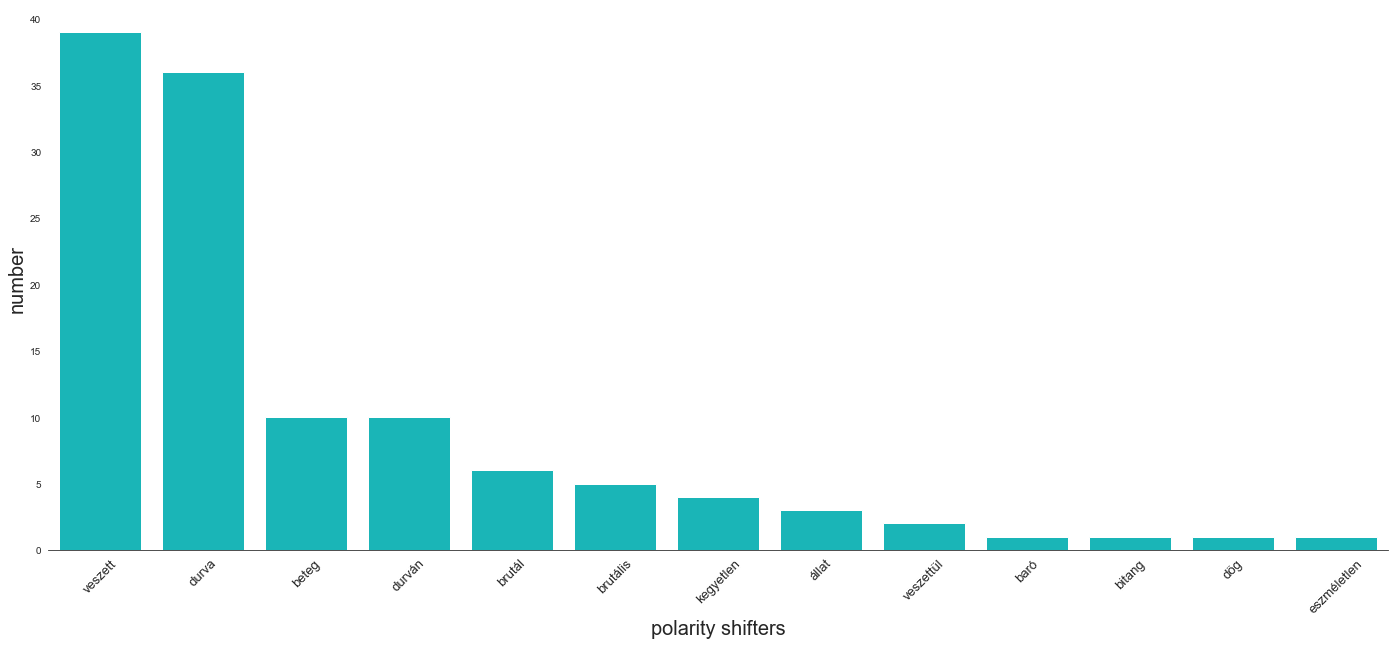

In [22]:
#visualization2

import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns

#Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})

#Plot 1 - background - "total" (top) series
ax = sns.barplot(x = a_freq.nei, y = a_freq.count_a, color = "darkturquoise")

#Plot 2 - overlay - "bottom" series
#bottom_plot = sns.barplot(x = top40_NO_ANN.token, y = top40_NO_ANN.freq_male_token, color = "darkturquoise")

topbar = plt.Rectangle((0,0),1,1,fc="lightcoral", edgecolor = 'none')
#bottombar = plt.Rectangle((0,0),1,1,fc='darkturquoise',  edgecolor = 'none')
#plt.legend(loc=1, ncol = 2, prop={'size':20})
#l.draw_frame(False)

#Optional code - Make plot look nicer
sns.despine(left=True)
ax.set_ylabel("number", fontsize=20)
ax.set_xlabel("polarity shifters", fontsize=20)

plt.xticks(rotation=45,fontsize=13)

#Set fonts to consistent 16pt size
#for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
        #     bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
#item.set_fontsize(20)

plt.savefig('a_freq_ANN.png',dpi=600, bbox_inches='tight', quality=95)

In [23]:
all_freq = csak_eva_ANNOTALT.groupby(['nei','annotacio'], sort=True).size().reset_index(name='count')
#all_freq["freq"] = all_freq["count"]/len(a_ANNOTALT)
all_freq

,nei,annotacio,count
0,baromi,0,1
1,baromi,e,3
2,baró,a,1
3,beteg,0,62
4,beteg,?,25
...,...,...,...
57,állat,e,26
58,őrült,0,20
59,őrült,?,2
60,őrült,e,4


In [ ]:
#COMPARING THE NUMBER AND FREQUENCY OF ALL THE 4 ANNOTATION TAGS

In [25]:
#merge the two datasets to calculate the number and frequency of all the 4 annotation tags
all_freq = pd.merge(all_freq, csak_eva_freq, on = ['nei'], how = 'left')
all_freq

,nei,annotacio,count,count_eva,freq
0,baromi,0,1,4,0.004813
1,baromi,e,3,4,0.004813
2,baró,a,1,1,0.001203
3,beteg,0,62,97,0.116727
4,beteg,?,25,97,0.116727
...,...,...,...,...,...
57,állat,e,26,54,0.064982
58,őrült,0,20,26,0.031288
59,őrült,?,2,26,0.031288
60,őrült,e,4,26,0.031288


In [26]:
#ascending order of the results
all_freq = all_freq.sort_values(['count_eva'],ascending=False)
all_freq

,nei,annotacio,count,count_eva,freq
15,durva,?,110,213,0.256318
16,durva,a,36,213,0.256318
14,durva,0,67,213,0.256318
49,veszett,0,45,153,0.184116
50,veszett,?,65,153,0.184116
...,...,...,...,...,...
44,mocskosul,0,1,1,0.001203
13,brutálisan,e,1,1,0.001203
6,bitang,a,1,1,0.001203
2,baró,a,1,1,0.001203


In [43]:
#save the results
all_freq.to_excel('all_freq.xlsx',sheet_name = 'all_freq', index = False)

In [27]:
#read the data 
all_freq_1 = pd.read_excel('all_freq.xlsx')
all_freq_1

,nei,annotacio,count,count_eva,freq
0,durva,?,110,213,0.256318
1,durva,a,36,213,0.256318
2,durva,0,67,213,0.256318
3,veszett,0,45,153,0.184116
4,veszett,?,65,153,0.184116
...,...,...,...,...,...
57,mocskosul,0,1,1,0.001203
58,brutálisan,e,1,1,0.001203
59,bitang,a,1,1,0.001203
60,baró,a,1,1,0.001203


In [28]:
#pivot the data for the visualization
all_freq_pivoted = all_freq_1.pivot_table(index="nei", columns="annotacio", values="count", fill_value=0)
all_freq_pivoted

annotacio,0,?,a,e
nei,,,,
baromi,1,0,0,3
baró,0,0,1,0
beteg,61,26,10,0
bitang,0,0,1,0
brutál,0,5,6,10
brutális,0,2,5,1
brutálisan,0,0,0,1
durva,67,110,36,0
durván,11,6,10,17


In [29]:
#data formatting
all_freq_pivoted = pd.DataFrame(all_freq_pivoted.to_records())
all_freq_pivoted

,nei,0,?,a,e
0,baromi,1,0,0,3
1,baró,0,0,1,0
2,beteg,61,26,10,0
3,bitang,0,0,1,0
4,brutál,0,5,6,10
5,brutális,0,2,5,1
6,brutálisan,0,0,0,1
7,durva,67,110,36,0
8,durván,11,6,10,17
9,dög,7,0,1,0


In [31]:
#merge the 2 data (in order to get the proper order of the words)
all_freq_pivot = pd.merge(csak_eva_freq, all_freq_pivoted, on = ['nei'], how = 'left')
all_freq_pivot

,nei,count_eva,freq,0,?,a,e
0,durva,213,0.256318,67,110,36,0
1,veszett,153,0.184116,45,65,39,4
2,beteg,97,0.116727,61,26,10,0
3,kurvára,73,0.087846,5,0,0,68
4,állat,54,0.064982,22,3,3,26
5,kegyetlen,51,0.061372,42,3,4,2
6,durván,44,0.052948,11,6,10,17
7,őrült,26,0.031288,20,2,0,4
8,brutál,21,0.025271,0,5,6,10
9,félelmetes,17,0.020457,13,4,0,0


In [80]:
#save the results
all_freq_pivot.to_excel('all_freq_pivot.xlsx',sheet_name = 'all_freq_pivot', index = False)

In [32]:
#read and format the data 
all_freq_pivot.columns=['new','count_eva','freq','prior meaning','figurative sense','polarity shifter','polarity loser']
all_freq_pivot

,new,count_eva,freq,prior meaning,figurative sense,polarity shifter,polarity loser
0,durva,213,0.256318,67,110,36,0
1,veszett,153,0.184116,45,65,39,4
2,beteg,97,0.116727,61,26,10,0
3,kurvára,73,0.087846,5,0,0,68
4,állat,54,0.064982,22,3,3,26
5,kegyetlen,51,0.061372,42,3,4,2
6,durván,44,0.052948,11,6,10,17
7,őrült,26,0.031288,20,2,0,4
8,brutál,21,0.025271,0,5,6,10
9,félelmetes,17,0.020457,13,4,0,0


In [35]:
#convert the column "new" to index
all_freq_pivot = all_freq_pivot.set_index('new')
all_freq_pivot

,prior meaning,figurative sense,polarity loser,polarity shifter
new,,,,
durva,67,110,0,36
veszett,45,65,4,39
beteg,61,26,0,10
kurvára,5,0,68,0
állat,22,3,26,3
kegyetlen,42,3,2,4
durván,11,6,17,10
őrült,20,2,4,0
brutál,0,5,10,6


In [36]:
#select the top 10
plotdata_top10 = all_freq_pivot[:10]
plotdata_top10

,prior meaning,figurative sense,polarity loser,polarity shifter
new,,,,
durva,67,110,0,36
veszett,45,65,4,39
beteg,61,26,0,10
kurvára,5,0,68,0
állat,22,3,26,3
kegyetlen,42,3,2,4
durván,11,6,17,10
őrült,20,2,4,0
brutál,0,5,10,6


<ipython-input-71-8459ae1b03cb>:28: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('plotdata_top10.png',dpi=600, bbox_inches='tight', quality=95)


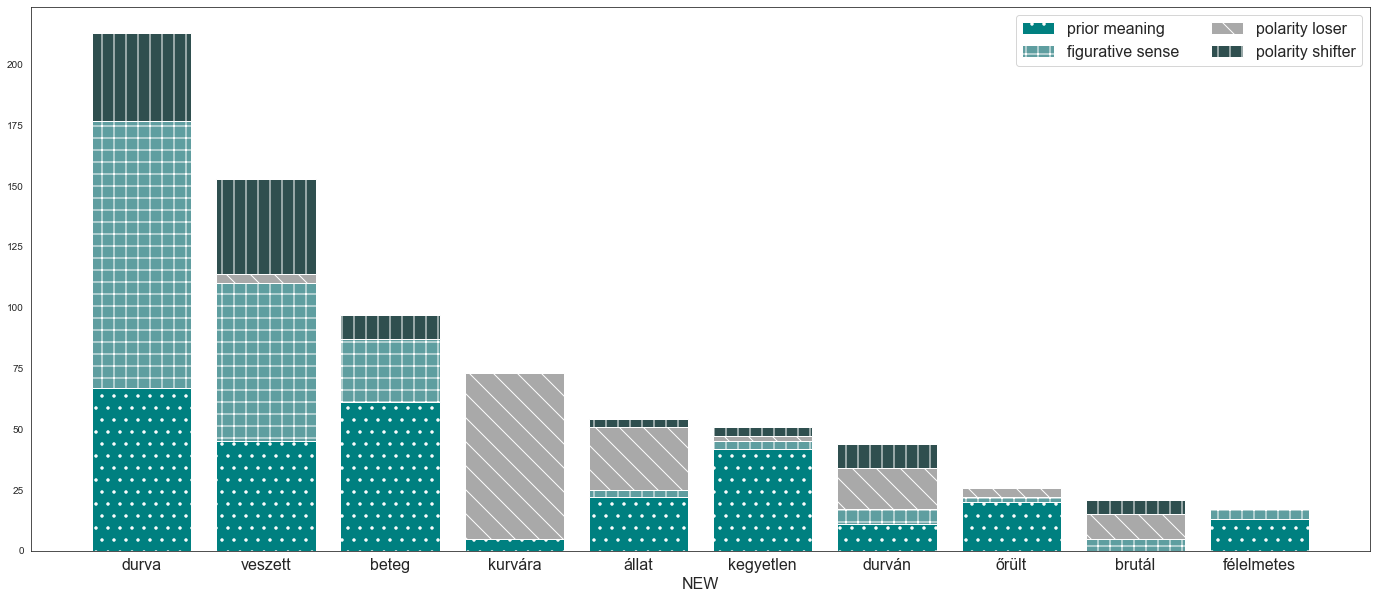

In [71]:
#visualization3

import matplotlib.pyplot as plt
import numpy as np
import matplotlib

labels = plotdata_top10.index

y1 = plotdata_top10['prior meaning']
y2 = plotdata_top10['figurative sense']
y3 = plotdata_top10['polarity loser']
y4 = plotdata_top10['polarity shifter']
   # the width of the bars: can also be len(x) sequence

#fig, ax = plt.subplots()

p1 = plt.bar(labels, y1, color='teal',hatch='.')
p2 = plt.bar(labels, y2, color='cadetblue', hatch='+', bottom=y1)
p3 = plt.bar(labels, y3, color='darkgrey', hatch='\\', bottom=np.array(y1)+np.array(y2))
p4 = plt.bar(labels, y4, color='darkslategrey', hatch='|', bottom=np.array(y1)+np.array(y2)+np.array(y3))

# Just add a title and rotate the x-axis labels to be horizontal.
#plt.title('Tips by Day and Gender')
plt.xticks(rotation=0, ha='center', fontsize=16)
plt.legend([p1, p2, p3, p4], ['prior meaning','figurative sense','polarity loser','polarity shifter'], loc = 1, ncol = 2, prop={'size':16})
plt.xlabel("NEW", fontsize=16)

plt.savefig('plotdata_top10.png',dpi=600, bbox_inches='tight', quality=95)

plt.show()